In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("customers.csv")

In [3]:
# Select columns
cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
X = df[cols]

In [4]:
# Scale the data (VERY IMPORTANT for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [14]:
# DBSCAN model
db = DBSCAN(eps=1.2, min_samples=3)   # you can tune these values
labels = db.fit_predict(X_scaled)


In [15]:

# Add cluster labels to dataframe
df['Cluster'] = labels


In [16]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,-1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,-1
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,0


In [17]:

# Reduce to 2D for scatter plot using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

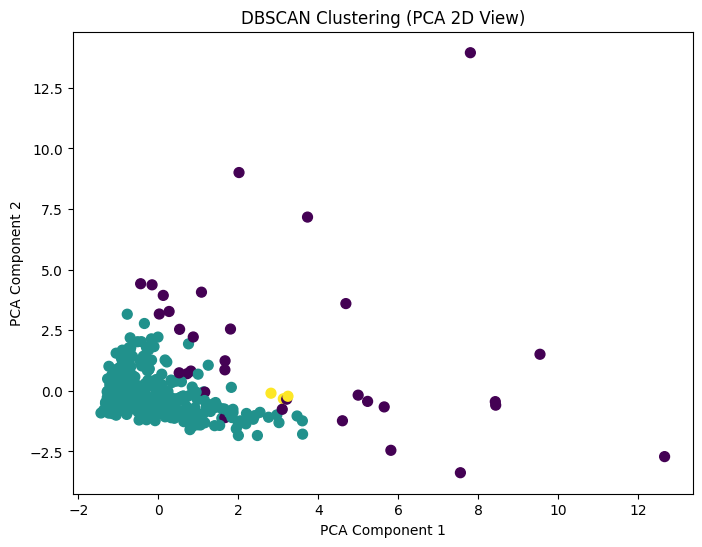

In [18]:

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=50)
plt.title("DBSCAN Clustering (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
